<a href="https://colab.research.google.com/github/sarangKP/Projects/blob/main/testingModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
#Connect to drive

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Loading Model

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Training/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
cnn = tf.keras.models.load_model("/content/trained_model.h5")

##Visualization and Performing Prediction on Single Image

<function matplotlib.pyplot.show(close=None, block=None)>

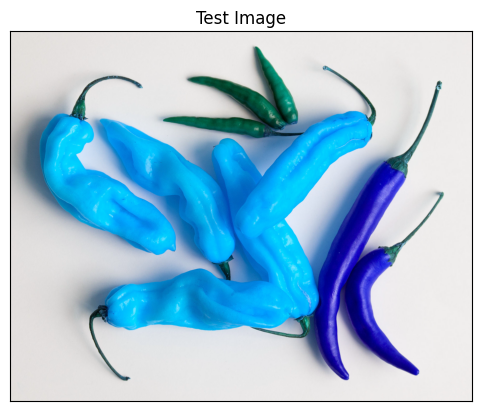

In [ ]:
import cv2
image_path="/content/drive/MyDrive/Fruit_Vegetable_Training/test/chilli pepper/Image_1.jpg"
img= cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show

#Testing Model

In [ ]:
image= tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr= tf.keras.preprocessing.image.img_to_array=(image)
input_arr=np.array([input_arr])  #Converting single image to batch
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 27ms/step


In [ ]:
print(predictions[0])

[1.4287269e-17 5.5565213e-25 4.6289543e-12 4.3972187e-15 3.1408185e-19
 2.7035350e-15 2.2425740e-16 2.0130815e-27 1.0000000e+00 4.2426038e-11
 1.8770638e-12 1.5539071e-16 1.6413232e-22 1.6886799e-18 3.2370559e-10
 2.0534641e-15 2.8171212e-18 1.4864003e-25 2.6724355e-15 6.8343298e-16
 3.4713117e-17 1.0177755e-24 3.6360073e-22 2.8872127e-22 1.2546524e-18
 1.3645092e-15 5.7972194e-21 2.3592303e-19 9.6245518e-21 1.8259787e-14
 2.6914998e-12 5.2621768e-16 2.4402202e-18 1.4009713e-15 1.0310137e-11
 4.7840637e-19]


In [ ]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
result_index=np.where(predictions[0] == max(predictions[0]))
print(result_index[0][0])

8


<function matplotlib.pyplot.show(close=None, block=None)>

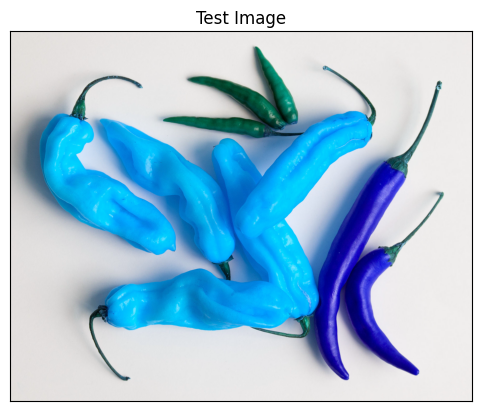

In [ ]:
#Display image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show

In [ ]:
#Single prediction
print("It is a : {}".format(test_set.class_names[result_index[0][0]]))

It is a : chilli pepper
